# 1 Image Processing

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import random
import matplotlib.pyplot as plt
import numpy as np
from torch import optim
from torch.optim import lr_scheduler
import torchvision.models as models

# ----------------------------------------------------------------------------------------------
# Augmentation
# Define data augmentation transforms
# Define data augmentation transforms
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(20),  # Randomly rotate the image up to 30 degrees
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),  # Adjust color
    transforms.RandomApply([transforms.RandomAffine(degrees=0, translate=(0.1, 0.1))], p=.5),  # Random affine transformation
    transforms.RandomApply([transforms.RandomPerspective(distortion_scale=0.2)], p=.5),  # Randomly apply perspective transformations
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Random resized crop
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize the image to RGB
])

test_transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize the image to RGB
])

# Define the data loaders
train_dataset = ImageFolder(root='/local/data1/honzh073/data/hospital_43_data/train', transform=train_transform)
# validation_dataset = ImageFolder(root='/local/data1/honzh073/data/patient_level_dataset/val', transform=test_transform)
test_dataset = ImageFolder(root='/local/data1/honzh073/data/hospital_43_data/test', transform=test_transform)

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
# validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

# ----------------------------------------------------------------------------------------------
# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available!")
    device = torch.device("cuda:0")  # Use GPU 0
else:
    print("CUDA is not available.")
    device = torch.device("cpu")
# ----------------------------------------------------------------------------------------------
print('done!')


CUDA is available!
done!


# Plot Images

Image 1 Path: /local/data1/honzh073/data/hospital_43_data/test/0_NFF/patient_LIDDUNYZKJ/patient_LIDDUNYZKJ_hospital_43_NFF_image_1.png
Image 2 Path: /local/data1/honzh073/data/hospital_43_data/test/1_AFF/patient_NGLGWBFXUD/patient_NGLGWBFXUD_hospital_43_AFF_image_3.png
Image 3 Path: /local/data1/honzh073/data/hospital_43_data/test/1_AFF/patient_EYRSUJGIZG/patient_EYRSUJGIZG_hospital_43_AFF_image_3.png
Image 4 Path: /local/data1/honzh073/data/hospital_43_data/test/1_AFF/patient_LNXBCFQICO/patient_LNXBCFQICO_hospital_43_AFF_image_2.png
Image 5 Path: /local/data1/honzh073/data/hospital_43_data/test/1_AFF/patient_IHUZCYWODS/patient_IHUZCYWODS_hospital_43_AFF_image_3.png


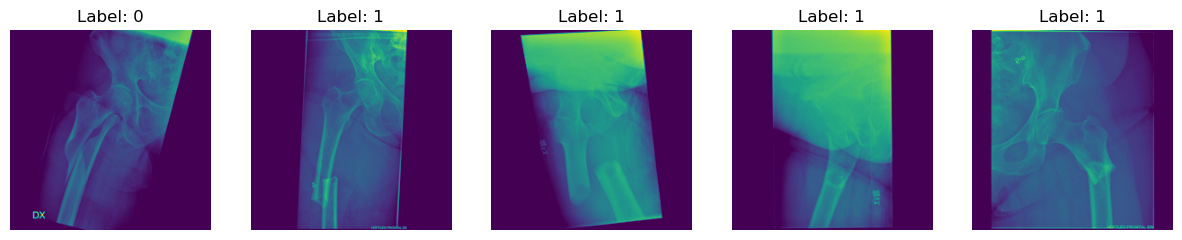

In [2]:
# Get some random indices from the validation dataset
random_indices = np.random.choice(len(test_dataset), 5, replace=False)

# Print image file paths
for i, idx in enumerate(random_indices):
    filename = test_dataset.samples[idx][0]  # Get the filename
    print(f"Image {i + 1} Path: {filename}")

# Plot images (transformed) with truncated names
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    image, label = test_dataset[idx]  # Use validation_dataset directly
    filename = test_dataset.samples[idx][0]  # Get the filename
    truncated_filename = filename.split('/')[-1][:15]  # Extract the last part and truncate to 15 characters
    plt.subplot(1, 5, i + 1)
    plt.title(f"Label: {label}")
    # plt.imshow(image[0], cmap='gray')  # Single-channel (grayscale)
    plt.imshow(image[0])  # Single-channel (grayscale)

    plt.axis('off')
plt.show()


# Class weights of Training Dataset

In [8]:
# ---------------------------------------------------------------------------------
import os

def count_number(path_folder):
    # AFF和NFF文件夹路径
    aff_folder = os.path.join(path_folder, '1_AFF')
    nff_folder = os.path.join(path_folder, '0_NFF')

    # 统计AFF和NFF文件夹中的图片数量
    aff_image_count = sum(len(files) for _, _, files in os.walk(aff_folder))
    nff_image_count = sum(len(files) for _, _, files in os.walk(nff_folder))
    
    return aff_image_count, nff_image_count

print('Total:')
path_folder = '/local/data1/honzh073/data/hospital_43'
total_aff_num, total_nff_num = count_number(path_folder)
print('aff number:', total_aff_num, '; nff number:', total_nff_num)

print('Train:')
path_folder = '/local/data1/honzh073/data/hospital_43_data/train'
aff_num, nff_num = count_number(path_folder)
print('aff number:', aff_num, '; nff number:', nff_num)
print('%:', round(aff_num / total_aff_num * 100, 0), '; %:', round(nff_num / total_nff_num * 100, 0))

# print('Val:')
# path_folder = '/local/data1/honzh073/data/patient_level_dataset/val'
# aff_num, nff_num = count_number(path_folder)
# print('aff number:', aff_num, '; nff number:', nff_num)
# print('%:', round(aff_num / total_aff_num * 100, 0), '; %:', round(nff_num / total_nff_num * 100, 0))

print('Test:')
path_folder = '/local/data1/honzh073/data/hospital_43_data/test'
aff_num, nff_num = count_number(path_folder)
print('aff number:', aff_num, '; nff number:', nff_num)
print('%:', round(aff_num / total_aff_num * 100, 0), '; %:', round(nff_num / total_nff_num * 100, 0))

# aff and nff numbers in training dataset
train_aff_count = sum(1 for _, label in train_dataset if label == 0)  # 0 AFF
train_nff_count = sum(1 for _, label in train_dataset if label == 1)  # 1 NFF

# ---------------------------------------------------------------------------------
# Calculate class weights
n_aff_train = train_aff_count
n_nff_train = train_nff_count

class_weight_aff = 1 / (2 * (n_aff_train / (n_aff_train + n_nff_train)))
class_weight_nff = 1 / (2 * (n_nff_train / (n_aff_train + n_nff_train)))

print(f"Class Weight for NFF (0): {class_weight_aff:.4f}")
print(f"Class Weight for AFF (1): {class_weight_nff:.4f}")


Total:
aff number: 75 ; nff number: 170
Train:
aff number: 51 ; nff number: 119
%: 68.0 ; %: 70.0
Test:
aff number: 24 ; nff number: 51
%: 32.0 ; %: 30.0
Class Weight for NFF (0): 0.7143
Class Weight for AFF (1): 1.6667


# ResNet152
## lr = 0.0001, step_size = 10, and gamma = 0.1

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import models
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

# 设置设备
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 分层五折交叉验证
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 定义超参数
lr = 0.0001
step_size = 10
gamma = 0.1
num_epochs = 50

def collate_data(batch, patient_ids):
    # 获取batch中每个数据点的患者ID
    batch_patient_ids = [item['patient_id'] for item in batch]

    # 确保患者ID不会同时出现在同一个batch的训练和验证集中
    train_data = []
    val_data = []

    for data, patient_id in zip(batch, batch_patient_ids):
        if patient_id in patient_ids:
            train_data.append(data)
            patient_ids.remove(patient_id)
        else:
            val_data.append(data)

    # 返回训练和验证集的数据
    return train_data, val_data


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 循环每一折
for fold, (train_idx, val_idx) in enumerate(kfold.split(train_dataset, train_dataset.targets)):
    print(f'Fold {fold + 1}')

    # 获取每个fold的训练和验证患者ID
    train_patients = [train_dataset.patients[idx] for idx in train_idx]
    val_patients = [train_dataset.patients[idx] for idx in val_idx]

    # 构建训练集和验证集的数据加载器
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, 
                                               sampler=torch.utils.data.SubsetRandomSampler(train_idx),
                                               collate_fn=lambda x: collate_data(x, train_patients))
    val_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, 
                                             sampler=torch.utils.data.SubsetRandomSampler(val_idx),
                                             collate_fn=lambda x: collate_data(x, val_patients))


    # 构建模型
    model = models.resnet152(pretrained=True)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 2)
    model = model.to(device)

    # 定义损失函数和优化器
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)

    # 训练模型
    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
        train_loss = train_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        predictions, true_labels = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                predictions.extend(preds.cpu().numpy())
                true_labels.extend(labels.cpu().numpy())
        val_loss = val_loss / len(val_loader.dataset)
        val_losses.append(val_loss)

        val_accuracy = accuracy_score(true_labels, predictions)
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Acc: {val_accuracy:.2f}')

        scheduler.step()

    # 绘制训练和验证损失曲线
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Fold {fold + 1}')

    # 在测试集上评估模型
    test_loss = 0.0
    predictions, true_labels = [], []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    test_loss = test_loss / len(test_loader.dataset)
    test_accuracy = accuracy_score(true_labels, predictions)

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}')

    # 注意：这里你可以选择保存每个fold的模型、预测结果等信息
    plt.show()


Fold 1


AttributeError: 'ImageFolder' object has no attribute 'patients'

In [67]:
# Define the data loaders
# test_dataset = ImageFolder(root='/local/data1/honzh073/data/hospital_33', transform=transform)

# batch_size = 64

# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)

from sklearn.metrics import confusion_matrix, classification_report

# Test dataset performance
model.eval()
correct_test = 0
total_test = 0
test_loss = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
        test_loss += loss.item()

test_accuracy = 100 * correct_test / total_test
test_loss /= len(test_loader)

print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.2f}%")


original_classes = train_loader.dataset.classes

# confusion matrix
with torch.no_grad():
    all_predictions = []
    all_labels = []

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

conf_matrix = confusion_matrix(all_labels, all_predictions)

# Precision、Recall、F1 Score
classification_rep = classification_report(all_labels, all_predictions, target_names=original_classes)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Test Loss: 0.2301, Test Acc: 89.81%
Confusion Matrix:
[[ 75   6]
 [ 38 313]]
Classification Report:
              precision    recall  f1-score   support

         AFF       0.66      0.93      0.77        81
         NFF       0.98      0.89      0.93       351

    accuracy                           0.90       432
   macro avg       0.82      0.91      0.85       432
weighted avg       0.92      0.90      0.90       432



# Save model

In [68]:
# Save the trained VGG model
torch.save(model.state_dict(), '/local/data1/honzh073/saved_model/patient_level_resnet152.pth')


In [69]:
def eva(test_loader):
        
    # Test dataset performance
    model.eval()
    correct_test = 0
    total_test = 0
    test_loss = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            test_loss += loss.item()

    test_accuracy = 100 * correct_test / total_test
    test_loss /= len(test_loader)

    print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.2f}%")

    from sklearn.metrics import confusion_matrix, classification_report

    original_classes = train_loader.dataset.classes

    # confusion matrix
    with torch.no_grad():
        all_predictions = []
        all_labels = []

        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    conf_matrix = confusion_matrix(all_labels, all_predictions)

    # Precision、Recall、F1 Score
    classification_rep = classification_report(all_labels, all_predictions, target_names=original_classes)

    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)


In [70]:
# 在所有image上的表现
images = ImageFolder(root='/local/data1/honzh073/data/8bit_by_types', transform=test_transform)

image_loader = DataLoader(images, batch_size=batch_size, shuffle=False, pin_memory=True)

eva(image_loader)

Test Loss: 0.1497, Test Acc: 94.29%
Confusion Matrix:
[[ 838   30]
 [ 218 3256]]
Classification Report:
              precision    recall  f1-score   support

         AFF       0.79      0.97      0.87       868
         NFF       0.99      0.94      0.96      3474

    accuracy                           0.94      4342
   macro avg       0.89      0.95      0.92      4342
weighted avg       0.95      0.94      0.94      4342



# Clean GPU memory

In [71]:
torch.cuda.empty_cache()


# VGG19

In [72]:
# from torchvision.models import vgg19, VGG19_Weights

# # Settings
# lr = 0.0001
# step_size = 10
# gamma = 0.1

# # Move class weights to the selected device
# class_weights = [class_weight_aff, class_weight_nff]
# class_weights = torch.Tensor(class_weights).to(device)

# # VGG19
# model = models.vgg19(weights=VGG19_Weights.DEFAULT)  # Load the pre-trained VGG19 model
# model.classifier[6] = nn.Linear(4096, 2)  # Modify the last fully connected layer
# model = model.to(device)

# # Loss function
# criterion = nn.CrossEntropyLoss(weight=class_weights)
# criterion = criterion.to(device)

# optimizer = optim.Adam(model.parameters(), lr=lr)
# scheduler = lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)

# # Training and validation
# train_losses = []
# validation_losses = []
# train_accuracies = []
# validation_accuracies = []

# num_epochs = 50
# for epoch in range(num_epochs):
#     model.train()
#     correct_train = 0
#     total_train = 0

#     for images, labels in train_loader:
#         images = images.to(device)
#         labels = labels.to(device)
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         _, predicted = torch.max(outputs.data, 1)
#         total_train += labels.size(0)
#         correct_train += (predicted == labels).sum().item()

#     train_accuracy = 100 * correct_train / total_train

#     model.eval()
#     correct_validation = 0
#     total_validation = 0
#     validation_loss = 0

#     with torch.no_grad():
#         for images, labels in validation_loader:
#             images = images.to(device)
#             labels = labels.to(device)

#             outputs = model(images)
#             loss = criterion(outputs, labels)

#             _, predicted = torch.max(outputs.data, 1)
#             total_validation += labels.size(0)
#             correct_validation += (predicted == labels).sum().item()
#             validation_loss += loss.item()

#     validation_accuracy = 100 * correct_validation / total_validation
#     validation_loss /= len(validation_loader)

#     train_losses.append(loss.item())
#     validation_losses.append(validation_loss)
#     train_accuracies.append(train_accuracy)
#     validation_accuracies.append(validation_accuracy)

#     print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item():.4f}, Validation Loss: {validation_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Validation Acc: {validation_accuracy:.2f}%")

#     scheduler.step()  # Step the learning rate scheduler

# # Plot loss and accuracy
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(train_losses, label='Train Loss')
# plt.plot(validation_losses, label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(train_accuracies, label='Train Accuracy')
# plt.plot(validation_accuracies, label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy (%)')
# plt.legend()

# plt.show()

# # Test the model on the test dataset
# model.eval()
# correct_test = 0
# total_test = 0
# test_loss = 0

# with torch.no_grad():
#     for images, labels in test_loader:
#         images = images.to(device)
#         labels = labels.to(device)

#         outputs = model(images)
#         loss = criterion(outputs, labels)

#         _, predicted = torch.max(outputs.data, 1)
#         total_test += labels.size(0)
#         correct_test += (predicted == labels).sum().item()
#         test_loss += loss.item()

# test_accuracy = 100 * correct_test / total_test
# test_loss /= len(test_loader)

# print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.2f}%")


In [73]:
# import torch
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming 'model' is your trained model
# model.eval()

# # Lists to store true labels, predicted labels, and images for incorrect predictions
# incorrect_true_labels = []
# incorrect_predicted_labels = []
# incorrect_images = []

# with torch.no_grad():
#     for inputs, labels in test_loader:
#         inputs, labels = inputs.to(device), labels.to(device)
#         outputs = model(inputs)
#         _, predicted = torch.max(outputs, 1)

#         incorrect_indices = (predicted != labels).nonzero()[:, 0]  # Find indices where predictions are incorrect
#         incorrect_true_labels.extend(labels[incorrect_indices].cpu().numpy())  # Append true labels to the list
#         incorrect_predicted_labels.extend(predicted[incorrect_indices].cpu().numpy())  # Append predicted labels to the list
#         incorrect_images.extend(inputs[incorrect_indices].cpu().numpy())  # Append images to the list

# # Convert the lists to numpy arrays for easier indexing
# incorrect_true_labels = np.array(incorrect_true_labels)
# incorrect_predicted_labels = np.array(incorrect_predicted_labels)
# incorrect_images = np.array(incorrect_images)

# # Define a function to display the incorrect predictions along with true and predicted labels
# def imshow(img, true_label, predicted_label, ax):
#     ax.imshow(img[0])  # Convert (C, H, W) to (H, W, C) for displaying with matplotlib
#     ax.set_title(f'{true_label} ({["aff", "nff"][true_label]}), {predicted_label} ({["aff", "nff"][predicted_label]})')
#     ax.text(0.5, -0.1, filename, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=8)

#     ax.axis('off')

# # Display incorrect predictions
# num_samples_to_display = len(incorrect_true_labels)
# num_columns = 5  # Number of columns in the display
# num_rows = int(np.ceil(num_samples_to_display / num_columns))  # Calculate the number of rows

# fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 15))
# fig.subplots_adjust(hspace=0.5)  # Adjust vertical space between subplots

# for i, (true_label, predicted_label, img) in enumerate(zip(incorrect_true_labels, incorrect_predicted_labels, incorrect_images)):
#     row = i // num_columns
#     col = i % num_columns
#     ax = axs[row, col] if num_rows > 1 else axs[col]
#     imshow(img, true_label, predicted_label, ax)

# # Hide empty subplots, if any
# for i in range(num_samples_to_display, num_rows * num_columns):
#     axs.flatten()[i].axis('off')

# plt.show()


In [74]:
# Save the trained VGG model
# torch.save(model.state_dict(), 'patient_level_vgg19.pth')
